# Explore Hacker News Post
---
Hacker News is a site started by the startup incubator __[Y Combinator](https://www.ycombinator.com/)__, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

You can find the data set __[here](https://www.kaggle.com/hacker-news/hacker-news-posts)__, but note that it has been reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions. Below are descriptions of the columns:

- `id`: The unique identifier from Hacker News for the post
- `title`: The title of the post
- `url`: The URL that the posts links to, if it the post has a URL
- `num_points`: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
- `num_comments`: The number of comments that were made on the post
- `author`: The username of the person who submitted the post
- `created_at`: The date and time at which the post was submitted

We're specifically interested in posts whose titles begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question.

We'll compare these two types of posts to determine the following:
- Do Ask HN or Show HN receive more comments on average?
- Do posts created at a certain time receive more comments on average?

In [1]:
import csv as c
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

opened_file = open("hacker_news.csv")
read_file = c.reader(opened_file)
hn = list(read_file)
hn_header = hn[0]
hn = hn[1:]
print(hn[:5])

[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16'], ['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94', '1', '0', 'markgainor1', '9/26/2016 3:14']]


In [2]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    Title = title.lower()
    if Title.startswith('ask hn'):
        ask_posts.append(row)
    elif Title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
print("Number of Ask Posts: ",len(ask_posts))
print("Number of Show Posts: ",len(show_posts))
print("Number of Other Posts: ",len(other_posts))

Number of Ask Posts:  9139
Number of Show Posts:  10158
Number of Other Posts:  273822


### Do Ask HN or Show HN receive more comments on average?

In [3]:
total_ask_comments = 0
total_show_comments = 0
total_other_comments = 0
for row in ask_posts:
    total_ask_comments += int(row[4])
for row in show_posts:
    total_show_comments += int(row[4])
for row in other_posts:
    total_other_comments += int(row[4])
avg_ask_comments = total_ask_comments/len(ask_posts)
avg_show_comments = total_show_comments/len(show_posts)
avg_other_comments = total_other_comments/len(other_posts)
print("Average comments for ask posts: ",'{:.2f}'.format(avg_ask_comments))
print("Average comments for show posts: ",'{:.2f}'.format(avg_show_comments))
print("Average comments for other posts: ",'{:.2f}'.format(avg_other_comments))

Average comments for ask posts:  10.39
Average comments for show posts:  4.89
Average comments for other posts:  6.46


On average, ask posts are likely to receive more comments compared to show posts. On average it is about 4 comments more. 

In [4]:
total_ask_points = 0
total_show_points = 0
total_other_points = 0
for row in ask_posts:
    total_ask_points += int(row[3])
for row in show_posts:
    total_show_points += int(row[3])
for row in other_posts:
    total_other_points += int(row[3])
avg_ask_points = total_ask_points/len(ask_posts)
avg_show_points = total_show_points/len(show_posts)
avg_other_points = total_other_points/len(other_posts)
print("Average points for ask posts: ",'{:.2f}'.format(avg_ask_points))
print("Average points for show posts: ",'{:.2f}'.format(avg_show_points))
print("Average points for other posts: ",'{:.2f}'.format(avg_other_points))

Average points for ask posts:  11.31
Average points for show posts:  14.84
Average points for other posts:  15.16


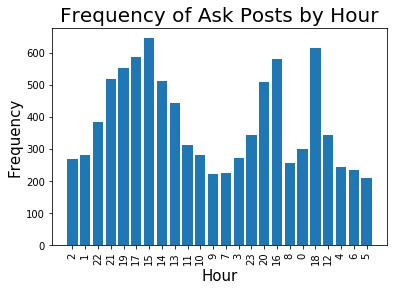

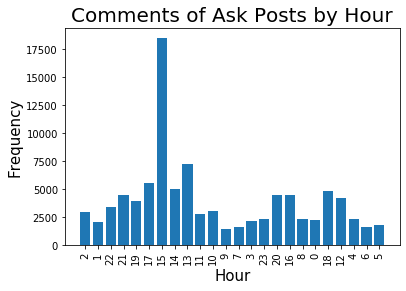

[[2, 11.137546468401487], [1, 7.407801418439717], [22, 8.804177545691905], [21, 8.687258687258687], [19, 7.163043478260869], [17, 9.449744463373083], [15, 28.676470588235293], [14, 9.692007797270955], [13, 16.31756756756757], [11, 8.96474358974359], [10, 10.684397163120567], [9, 6.653153153153153], [7, 7.013274336283186], [3, 7.948339483394834], [23, 6.696793002915452], [20, 8.749019607843136], [16, 7.713298791018998], [8, 9.190661478599221], [0, 7.5647840531561465], [18, 7.94299674267101], [12, 12.380116959064328], [4, 9.7119341563786], [6, 6.782051282051282], [5, 8.794258373205741]]


In [5]:
result_list = []
for row in ask_posts:
    created_at = row[6]
    comments = row[4]
    result_list.append([row[6],row[4]])
counts_by_hour = {}
comments_by_hour = {}
dateformat = "%m/%d/%Y %H:%M"
for row in result_list:
    date = row[0]
    comments = int(row[1])
    formatted_date = dt.datetime.strptime(date,dateformat)
    hour = formatted_date.hour
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comments

# Bar Graph
Keys = list(counts_by_hour.keys())
Values = list(counts_by_hour.values())
index = np.arange(len(counts_by_hour))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.title('Frequency of Ask Posts by Hour',fontsize=20)
plt.show()
# Bar Graph
Keys = list(comments_by_hour.keys())
Values = list(comments_by_hour.values())
index = np.arange(len(comments_by_hour))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90)
plt.title('Comments of Ask Posts by Hour',fontsize=20)
plt.show()

avg_by_hour = []
for row in comments_by_hour:
    avg_by_hour.append([row,comments_by_hour[row]/counts_by_hour[row]])
print(avg_by_hour)

In [6]:
swap_avg_by_hour = []
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1],row[0]])
print(swap_avg_by_hour)

[[11.137546468401487, 2], [7.407801418439717, 1], [8.804177545691905, 22], [8.687258687258687, 21], [7.163043478260869, 19], [9.449744463373083, 17], [28.676470588235293, 15], [9.692007797270955, 14], [16.31756756756757, 13], [8.96474358974359, 11], [10.684397163120567, 10], [6.653153153153153, 9], [7.013274336283186, 7], [7.948339483394834, 3], [6.696793002915452, 23], [8.749019607843136, 20], [7.713298791018998, 16], [9.190661478599221, 8], [7.5647840531561465, 0], [7.94299674267101, 18], [12.380116959064328, 12], [9.7119341563786, 4], [6.782051282051282, 6], [8.794258373205741, 5]]


Top 5 Hours for Ask Posts Comments
15:00:28.68 average comments per post
13:00:16.32 average comments per post
12:00:12.38 average comments per post
02:00:11.14 average comments per post
10:00:10.68 average comments per post


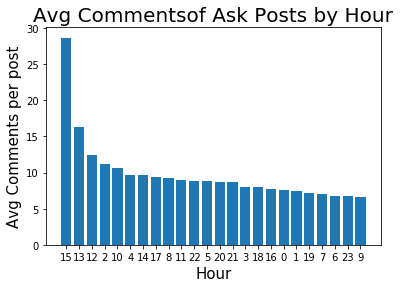

In [7]:
sorted_swap = sorted(swap_avg_by_hour,reverse=True)
print("Top 5 Hours for Ask Posts Comments")
for row in sorted_swap[:5]:
    HOUR = dt.datetime.strptime(str(row[1]),"%H")
    print('{0}:{1:.2f} average comments per post'.format(dt.datetime.strftime(HOUR,"%H:%M"),row[0]))

# Bar Graph
Keys = []
Values = []
for row in sorted_swap:
    Keys.append(row[1])
    Values.append(row[0])
index = np.arange(len(sorted_swap))
plt.bar(index,Values,tick_label=Keys)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Avg Comments per post', fontsize=15)
plt.xticks()
plt.title('Avg Commentsof Ask Posts by Hour',fontsize=20)
plt.show()

## Conclusion
Based on the above analysis, 15:00 hour observed highest number of comments for ask posts. Posting a question at that hour will provide highest chance of receiving comments.